<a href="https://colab.research.google.com/github/eric157/eric157/blob/main/Olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 2 - Olympics**

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

Reading the CSV files containing data on per capita income, life expectancy, population, and Olympics medals.

In [ ]:
CapitaData=pd.read_csv('/content/CapitaData.csv', encoding="latin-1")
LifeData=pd.read_csv('/content/LifeData.csv', encoding="latin-1")
PopulationData=pd.read_csv('/content/PopulationData.csv', encoding="latin-1")
OlympicsData=pd.read_csv('/content/OlympicsData.csv', encoding="latin-1")

Renaming the columns in LifeData to correct any encoding issues.

In [ ]:
LifeData.rename(columns={'ï»¿Country': 'Country'}, inplace=True)

Displaying the columns of each dataset for verification.

In [ ]:
print(CapitaData.columns)
print(LifeData.columns)
print(PopulationData.columns)
print(OlympicsData.columns)

Index(['Country', '2020'], dtype='object')
Index(['Country', 'Data'], dtype='object')
Index(['Country', 'Population'], dtype='object')
Index(['Rank', 'Country', 'Gold', 'Silver', 'Bronze', 'Total'], dtype='object')


Merging all the datasets on the 'Country' column to create a comprehensive dataset with all relevant information.

In [ ]:
CountryData = CapitaData.merge(LifeData, on='Country', how='inner')\
                        .merge(PopulationData, on='Country', how='inner')\
                        .merge(OlympicsData, on='Country', how='inner')

Renaming the columns of the merged dataset for clarity.

In [ ]:
CountryData.columns = ['Country', 'Per capita', 'Life expectancy', 'Population', 'Olympics Rank',
                       'Gold Medals', 'Silver Medals', 'Bronze Medals', 'Total Medals']

Saving the merged dataset to a CSV file.

In [ ]:
CountryData.to_csv('CountryData.csv', index=False)

In [ ]:
CountryData

,Country,Per capita,Life expectancy,Population,Olympics Rank,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,United States,"69,179",76.980488,"342,728,000",1,39,41,33,113
1,China,"10,608",78.077000,"1,433,604,000",2,38,32,18,88
2,Japan,"39,892",84.560000,"126,575,000",3,27,14,17,58
3,Australia,"58,123",83.200000,"25,656,000",6,17,7,22,46
4,Italy,"31,347",82.195122,"60,041,000",10,10,10,20,40
...,...,...,...,...,...,...,...,...,...
70,Burkina Faso,677,59.731000,"21,219,000",86,0,0,1,1
71,Ghana,"2,102",64.114000,"31,569,000",86,0,0,1,1
72,Grenada,"10,764",74.924000,"116,000",86,0,0,1,1
73,Kuwait,"37,584",76.920000,"4,464,000",86,0,0,1,1


Setting the 'Country' column as the index of the dataframe for easier plotting.

In [ ]:
CountryData.set_index('Country', inplace=True)
CountryData

,Per capita,Life expectancy,Population,Olympics Rank,Gold Medals,Silver Medals,Bronze Medals,Total Medals
Country,,,,,,,,
United States,"69,179",76.980488,"342,728,000",1,39,41,33,113
China,"10,608",78.077000,"1,433,604,000",2,38,32,18,88
Japan,"39,892",84.560000,"126,575,000",3,27,14,17,58
Australia,"58,123",83.200000,"25,656,000",6,17,7,22,46
Italy,"31,347",82.195122,"60,041,000",10,10,10,20,40
...,...,...,...,...,...,...,...,...
Burkina Faso,677,59.731000,"21,219,000",86,0,0,1,1
Ghana,"2,102",64.114000,"31,569,000",86,0,0,1,1
Grenada,"10,764",74.924000,"116,000",86,0,0,1,1


Plotting the stacked bar chart showing the count of gold, silver, and bronze medals won by each country.

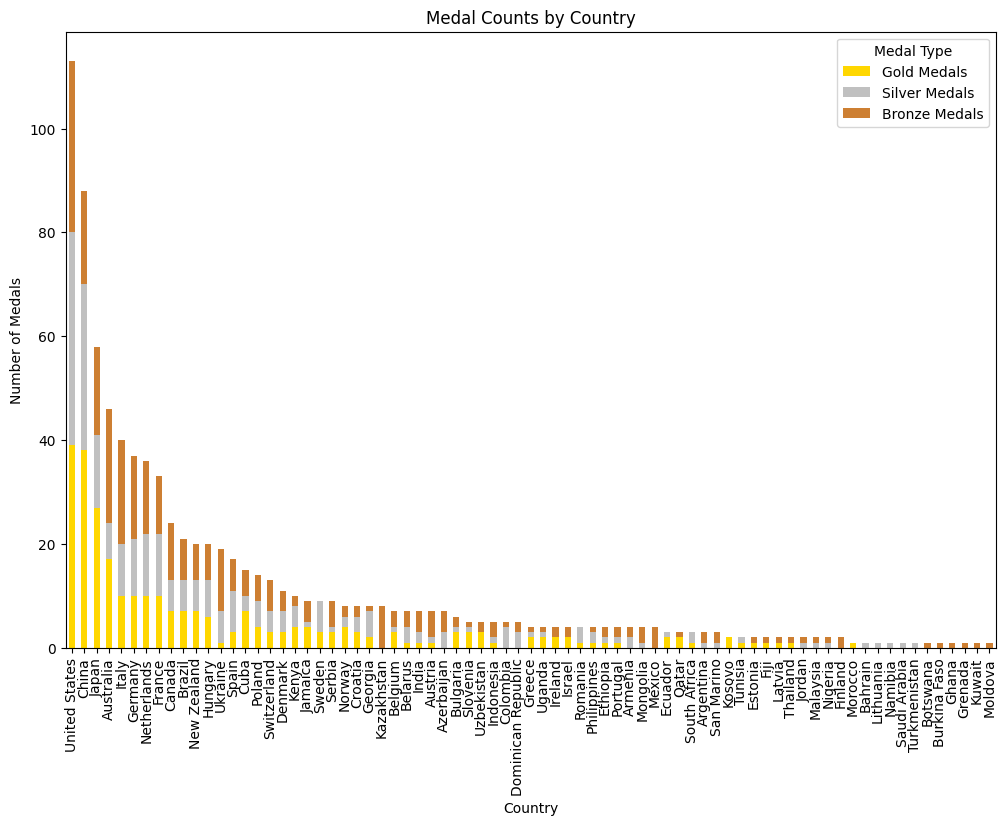

In [ ]:
colors = ['gold', 'silver', '#cd7f32']
CountryData[['Gold Medals', 'Silver Medals', 'Bronze Medals']].plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Medal Counts by Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.legend(title='Medal Type')
plt.show()




*   This plot shows the number of medals (gold, silver, and bronze) won by each country. The bars are stacked, making it easy to see the total number of medals as well as the distribution of each medal type.



Selecting the top 10 countries based on total medals won.

In [ ]:
top10 = CountryData.nlargest(10, 'Total Medals')
top10

,Per capita,Life expectancy,Population,Olympics Rank,Gold Medals,Silver Medals,Bronze Medals,Total Medals
Country,,,,,,,,
United States,"69,179",76.980488,"342,728,000",1,39,41,33,113
China,"10,608",78.077000,"1,433,604,000",2,38,32,18,88
Japan,"39,892",84.560000,"126,575,000",3,27,14,17,58
Australia,"58,123",83.200000,"25,656,000",6,17,7,22,46
Italy,"31,347",82.195122,"60,041,000",10,10,10,20,40
Germany,"45,453",81.041463,"83,635,000",9,10,11,16,37
Netherlands,"54,300",81.358537,"17,776,000",7,10,12,14,36
France,"38,919",82.175610,"68,337,000",8,10,12,11,33
Canada,"48,701",81.660488,"38,018,000",11,7,6,11,24


Plotting a pie chart to show the proportion of total medals won by the top 10 countries.

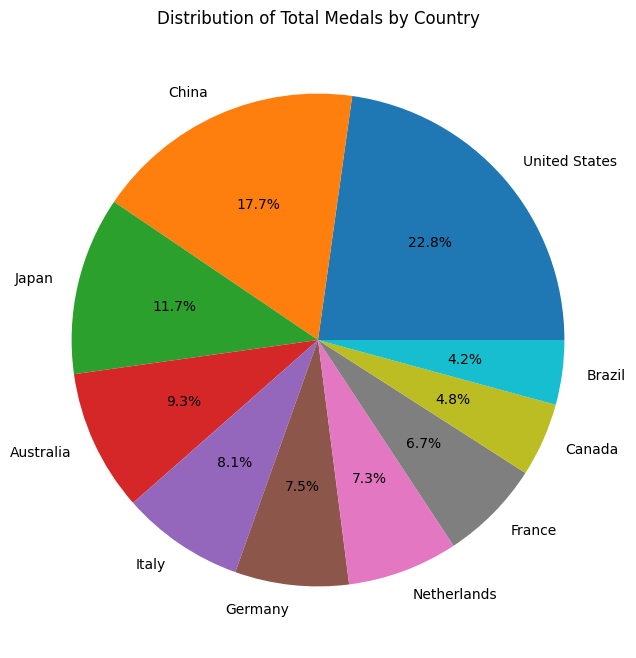

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(top10['Total Medals'], labels=top10.index, autopct='%1.1f%%')
plt.title('Distribution of Total Medals by Country')
plt.show()




*   This pie chart illustrates the proportion of total medals won by the top 10 countries. It helps visualize the dominance of certain countries in the Olympics.




Selecting the top 50 countries based on total medals won.

In [ ]:
top50 = CountryData.nlargest(50, 'Total Medals')
top50

,Per capita,Life expectancy,Population,Olympics Rank,Gold Medals,Silver Medals,Bronze Medals,Total Medals
Country,,,,,,,,
United States,"69,179",76.980488,"342,728,000",1,39,41,33,113
China,"10,608",78.077000,"1,433,604,000",2,38,32,18,88
Japan,"39,892",84.560000,"126,575,000",3,27,14,17,58
Australia,"58,123",83.200000,"25,656,000",6,17,7,22,46
Italy,"31,347",82.195122,"60,041,000",10,10,10,20,40
Germany,"45,453",81.041463,"83,635,000",9,10,11,16,37
Netherlands,"54,300",81.358537,"17,776,000",7,10,12,14,36
France,"38,919",82.175610,"68,337,000",8,10,12,11,33
Canada,"48,701",81.660488,"38,018,000",11,7,6,11,24


Plotting a scatter plot to show the relationship between population and the number of medals won.

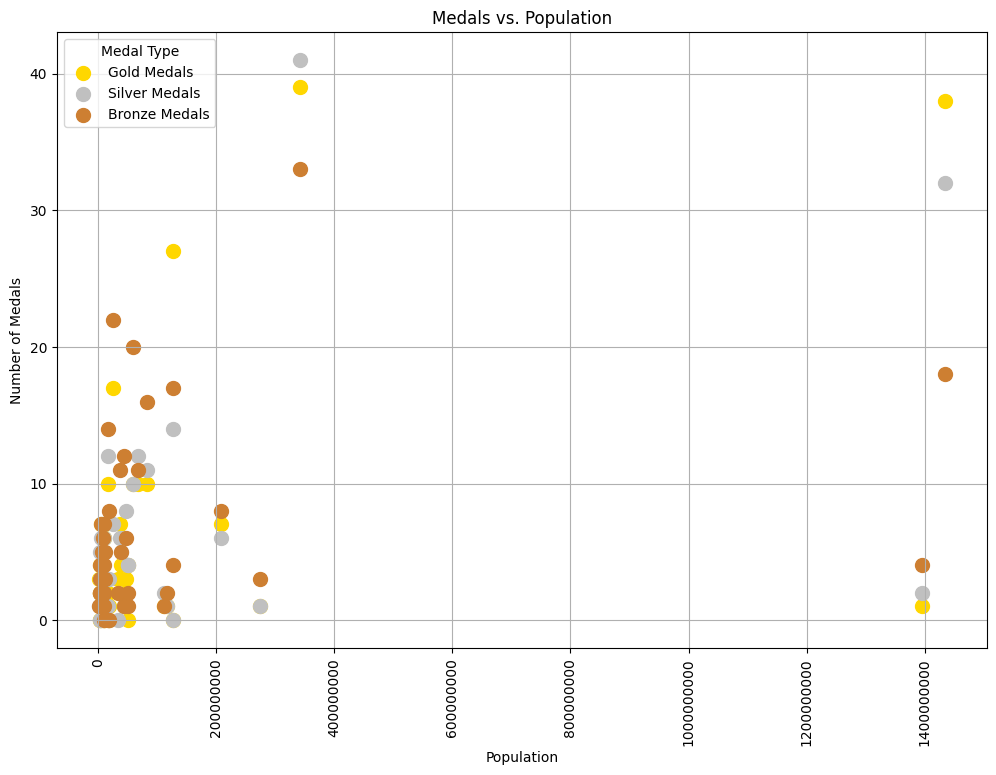

In [ ]:
top50['Population'] = top50['Population'].str.replace(',', '')
top50['Population'] = top50['Population'].astype(float)
top50_sorted = top50.sort_values(by='Population')


plt.figure(figsize=(12, 8))

plt.scatter(top50['Population'], top50['Gold Medals'], color='gold', s=100, label='Gold Medals')

plt.scatter(top50['Population'], top50['Silver Medals'], color='silver', s=100, label='Silver Medals')

plt.scatter(top50['Population'], top50['Bronze Medals'], color='#cd7f32', s=100, label='Bronze Medals')

plt.title('Medals vs. Population')
plt.xlabel('Population')
plt.ylabel('Number of Medals')

plt.grid(True)

plt.ticklabel_format(style='plain', axis='x')

plt.xticks(rotation=90)

plt.legend(title='Medal Type')

plt.show()




*   This scatter plot shows the relationship between a country's population and the number of medals won. The different colors represent gold, silver, and bronze medals, highlighting any correlation between population size and Olympic success.



**Percapita vs Olympics rank**

Plotting a scatter plot to show the relationship between per capita income and Olympics rank.

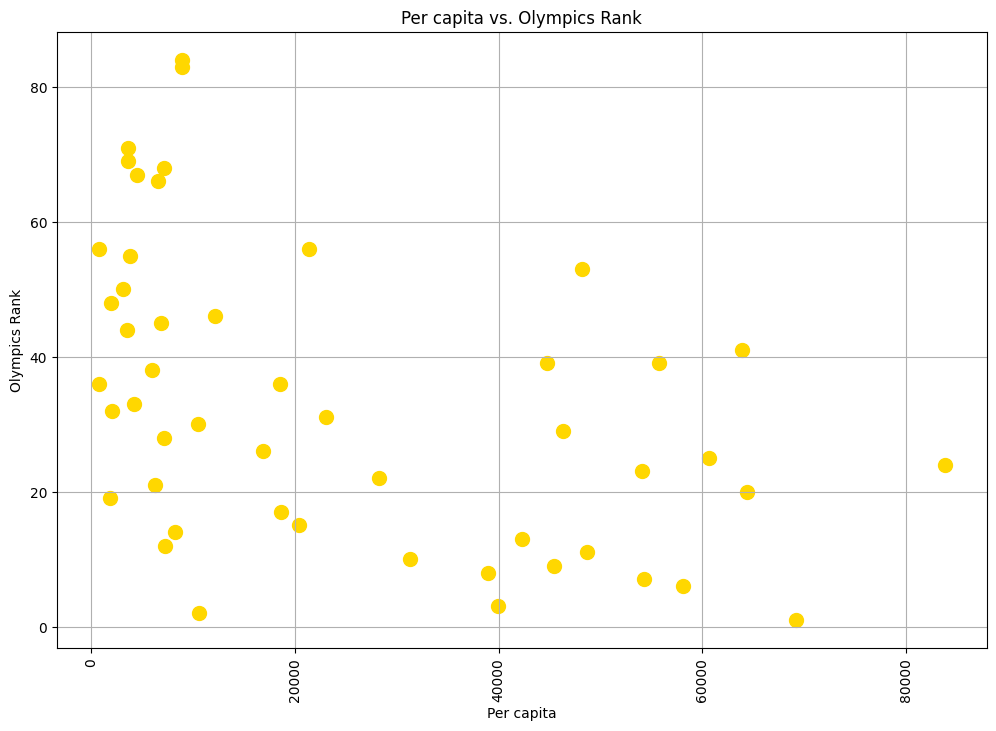

In [ ]:
top50['Per capita'] = top50['Per capita'].str.replace(',', '')
top50['Per capita'] = top50['Per capita'].astype(float)
top50_sorted = top50.sort_values(by='Per capita')
plt.figure(figsize=(12, 8))
plt.scatter( top50['Per capita'],top50['Olympics Rank'], color='gold', s=100, label='Per capita')
plt.title('Per capita vs. Olympics Rank')
plt.ylabel('Olympics Rank')
plt.xlabel('Per capita')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()




*   This scatter plot shows the relationship between a country's per capita income and its rank in the Olympics. It helps to explore whether wealthier countries tend to perform better in the Olympics.




Plotting a scatter plot to show the relationship between population and per capita income.


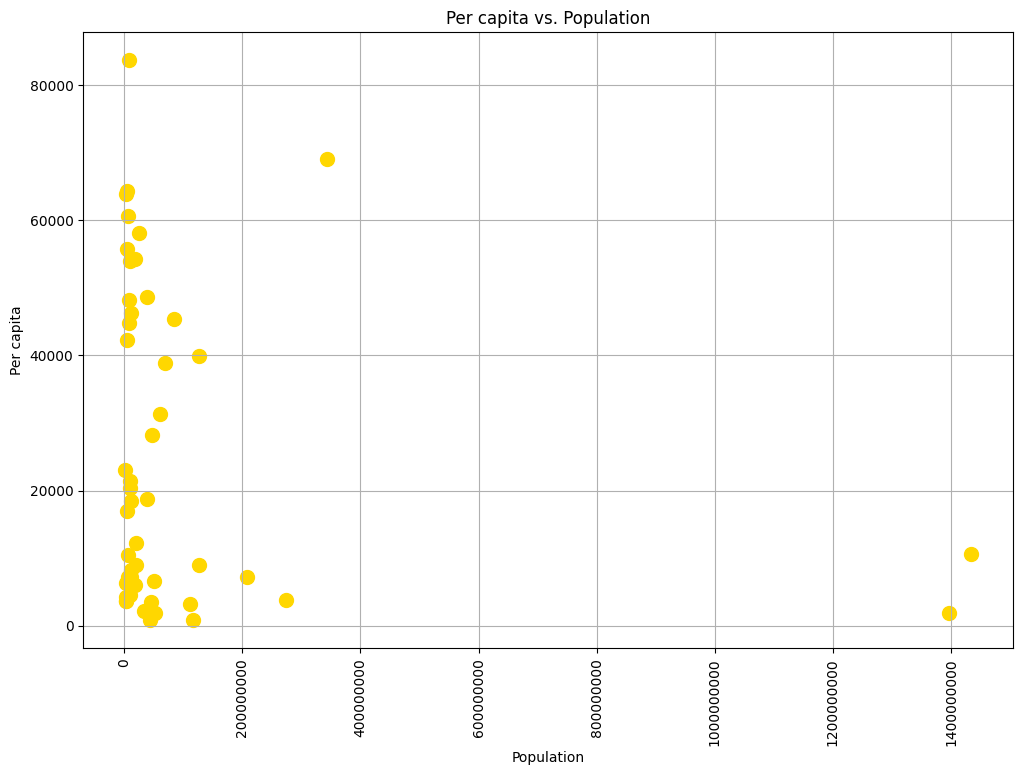

In [ ]:
top50['Population'] = top50['Population'].astype(str)
top50['Population'] = top50['Population'].str.replace(',', '')
top50['Population'] = top50['Population'].astype(float)
top50_sorted = top50.sort_values(by='Population')


plt.figure(figsize=(12, 8))

plt.scatter(top50['Population'], top50['Per capita'], color='gold', s=100, label='Gold Medals')

# plt.scatter(top50['Population'], top50['Silver Medals'], color='silver', s=100, label='Silver Medals')

# plt.scatter(top50['Population'], top50['Bronze Medals'], color='#cd7f32', s=100, label='Bronze Medals')

plt.title('Per capita vs. Population')
plt.xlabel('Population')
plt.ylabel('Per capita')

plt.grid(True)

# Format the x-axis labels (Population) without scientific notation
plt.ticklabel_format(style='plain', axis='x')

plt.xticks(rotation=90)

plt.show()




*   This scatter plot visualizes the relationship between population and per capita income of the top 50 countries. It's useful for identifying any patterns or outliers.



Plotting a combined bar and line chart to show the relationship between medal counts and population for the top 50 countries.

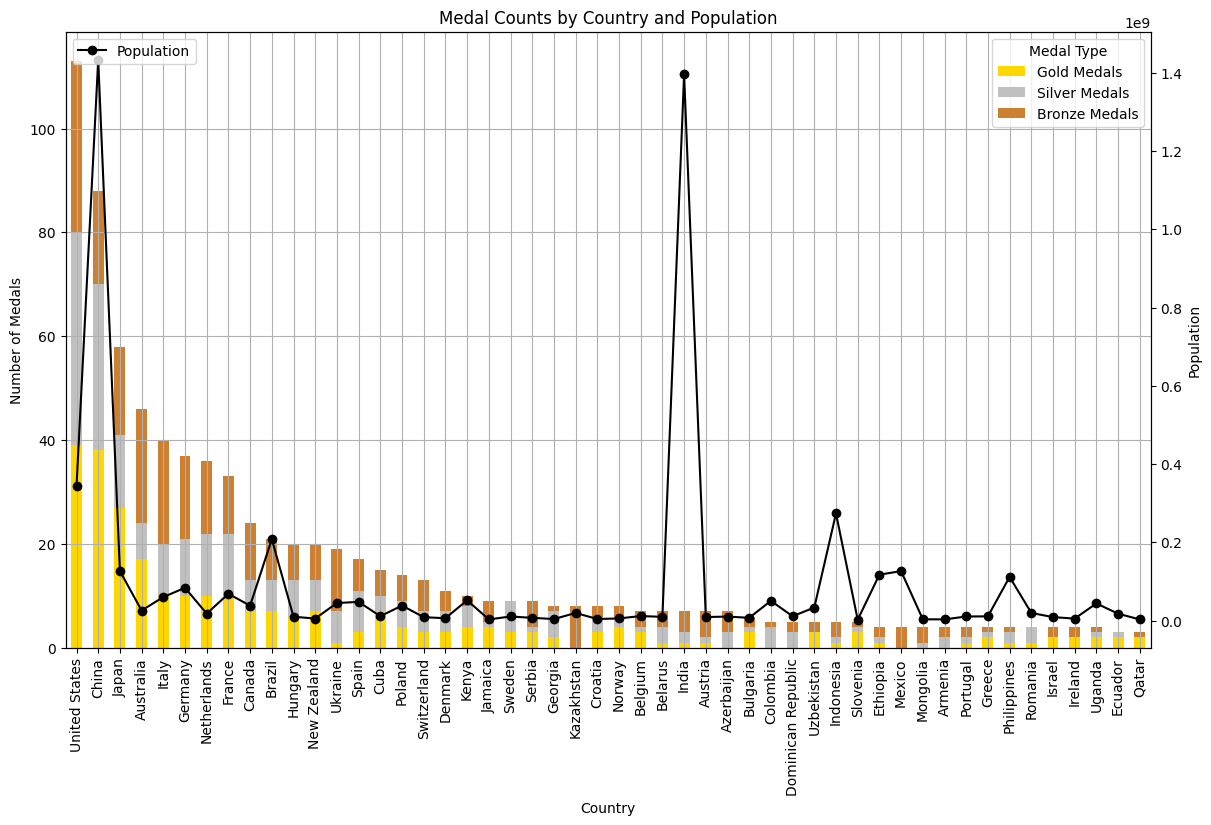

In [ ]:
top50['Population'] = top50['Population'].astype(str).str.strip()
top50['Population'] = top50['Population'].astype(float)

sorted_data = top50.sort_values(by='Total Medals', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['gold', 'silver', '#cd7f32']
sorted_data[['Gold Medals', 'Silver Medals', 'Bronze Medals']].plot(kind='bar', stacked=True, color=colors, ax=ax1)

ax1.set_title('Medal Counts by Country and Population')
ax1.set_xlabel('Country')
ax1.set_ylabel('Number of Medals')

# Add the second y-axis for population
ax2 = ax1.twinx()
ax2.plot(sorted_data.index, sorted_data['Population'], color='black', marker='o',label='Population')

ax2.set_ylabel('Population', color='black')
ax1.grid(True)
ax1.legend(title='Medal Type', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper left')

plt.xticks(rotation=45, ha='right')

plt.show()





*   This combined bar and line chart shows the relationship between the number of medals won and the population of each country. The bars represent the medals, while the line represents the population, providing a comprehensive view of how population size might impact Olympic success.



Reading a CSV file containing historical data of Olympic rankings over time.

In [ ]:
OvertimeData=pd.read_csv('/content/new_gold_rank.csv')
OvertimeData.head(10)

,country,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
0,Afghanistan,83.5,85.0,84.0,83.0,84.5,86.0,83.5,84.0,84.0,84.0,86.5,90.0,98.0,97.5,99.5,99.0,99.0,101.0,104.0
1,Algeria,83.5,85.0,84.0,83.0,84.5,86.0,83.5,84.0,84.0,84.0,86.5,32.0,32.0,44.5,99.5,99.0,46.0,101.0,104.0
2,Argentina,13.0,22.0,84.0,83.0,84.5,86.0,83.5,84.0,84.0,84.0,86.5,90.0,98.0,97.5,32.5,33.0,46.0,24.0,104.0
3,Armenia,83.5,85.0,84.0,83.0,84.5,86.0,83.5,84.0,84.0,84.0,86.5,90.0,44.5,97.5,99.5,99.0,99.0,49.0,104.0
4,Australia,16.5,8.0,3.0,5.0,8.0,9.0,5.0,84.0,16.0,14.5,16.0,10.5,8.0,4.0,4.0,6.0,9.0,10.5,6.0
5,Austria,16.5,85.0,84.0,19.0,84.5,86.0,83.5,84.0,22.5,22.0,26.5,90.0,98.0,32.0,32.5,99.0,99.0,101.0,54.5
6,Azerbaijan,83.5,85.0,84.0,83.0,84.5,86.0,83.5,84.0,84.0,84.0,86.5,90.0,98.0,32.0,48.0,46.5,31.5,49.0,104.0
7,Bahamas,83.5,85.0,84.0,83.0,23.5,86.0,83.5,84.0,84.0,84.0,86.5,90.0,98.0,32.0,48.0,99.0,46.0,49.0,38.0
8,Bahrain,83.5,85.0,84.0,83.0,84.5,86.0,83.5,84.0,84.0,84.0,86.5,90.0,98.0,97.5,99.5,99.0,46.0,49.0,104.0
9,Barbados,83.5,85.0,84.0,83.0,84.5,86.0,83.5,84.0,84.0,84.0,86.5,90.0,98.0,97.5,99.5,99.0,99.0,101.0,104.0


Sorting the data based on rankings over multiple Olympic years.

In [ ]:
sort_OvertimeData=OvertimeData.sort_values(by=['1948','1952','1956','1960','1964','1968','1972','1976','1980','1984','1988','1992','1996','2000','2004','2008','2012','2016','2020'])
top_ten_sorted = sort_OvertimeData.head(10)
top_ten_sorted

,country,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
133,United States of America,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,84.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
117,Sweden,2.0,4.0,7.0,19.0,17.0,18.5,10.5,9.5,11.0,17.0,86.5,32.0,32.0,18.5,18.5,99.0,46.0,32.5,27.0
41,France,3.0,8.0,10.0,83.0,23.5,6.0,18.0,15.0,7.5,12.0,8.5,9.0,5.0,6.0,7.0,11.0,6.5,7.0,8.5
52,Hungary,4.5,3.0,4.0,7.0,5.0,4.0,7.5,9.5,6.0,84.0,5.0,8.0,11.0,12.5,13.0,23.5,9.0,10.5,15.5
40,Finland,4.5,8.0,12.5,19.0,12.0,25.0,13.5,9.5,11.0,14.5,26.5,32.0,44.5,32.0,99.5,46.5,99.0,101.0,104.0
61,Italy,6.0,5.0,5.0,3.0,5.0,14.0,9.0,15.0,4.0,5.0,8.5,12.0,6.0,6.0,8.0,9.0,9.0,10.5,8.5
28,Czechoslovakia,7.5,6.0,21.0,10.5,9.0,6.0,18.0,15.0,16.0,84.0,16.0,15.0,98.0,97.5,99.5,99.0,99.0,101.0,104.0
127,Türkiye,7.5,13.5,12.5,6.0,17.0,18.5,83.5,84.0,84.0,84.0,26.5,23.0,17.0,24.0,22.5,46.5,46.0,49.0,38.0
31,Denmark,10.0,13.5,21.0,13.0,17.0,25.0,22.5,21.5,16.0,84.0,20.5,32.0,17.0,32.0,32.5,33.0,31.5,32.5,27.0
118,Switzerland,10.0,13.5,84.0,83.0,23.5,86.0,83.5,21.5,16.0,84.0,86.5,32.0,17.0,44.5,48.0,33.0,31.5,24.0,27.0


Plotting the rank changes of the top 10 countries over multiple Olympic years.

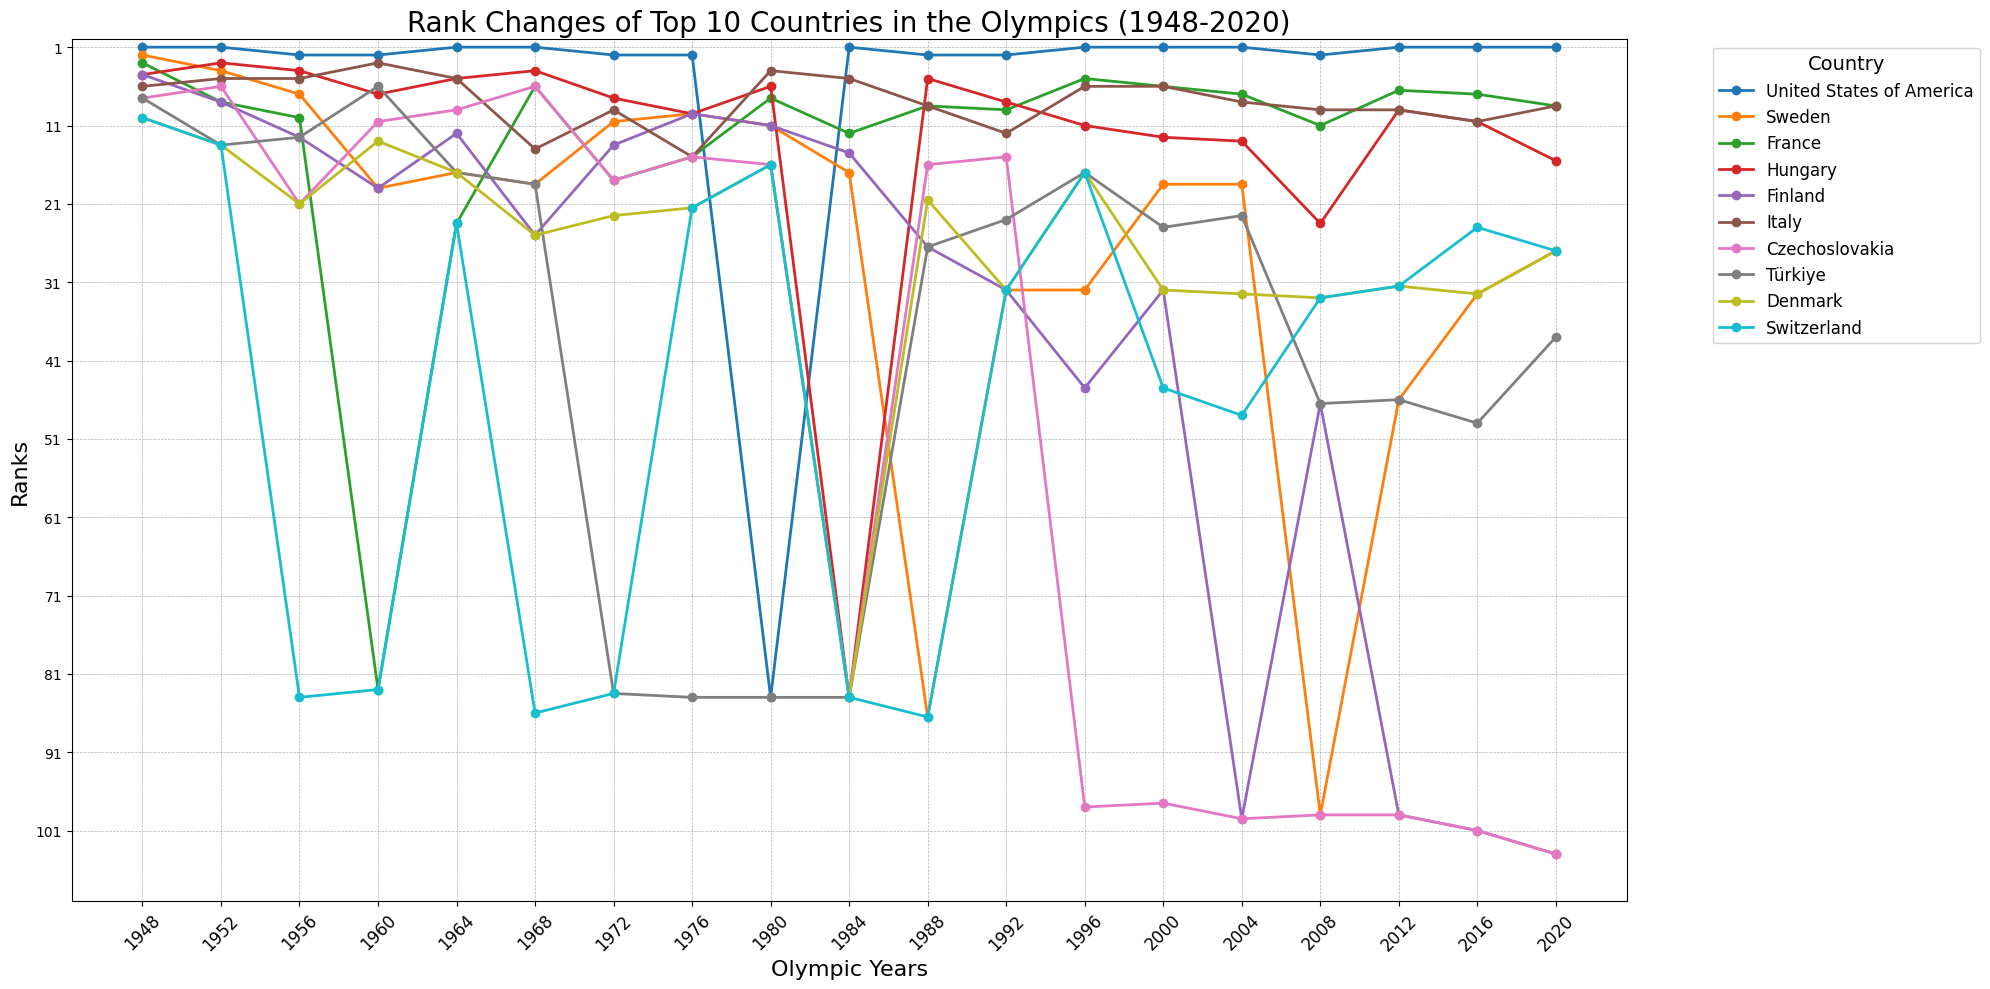

In [ ]:
plt.figure(figsize=(20, 10))
for a in range(0, 10):
    plt.plot(
        top_ten_sorted.columns[1:],
        top_ten_sorted.iloc[a, 1:],
        marker="o",
        label=top_ten_sorted.iloc[a, 0],
        linestyle='-',
        linewidth=2
    )
plt.ylabel("Ranks", fontsize=16)
plt.xlabel("Olympic Years", fontsize=16)
plt.title("Rank Changes of Top 10 Countries in the Olympics (1948-2020)", fontsize=20)
plt.yticks(range(1, 111, 10))
plt.ylim(110, 0)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Country', title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()



*   This line plot shows how the rankings of the top 10 countries have changed over different Olympic years from 1948 to 2020. It's useful for visualizing trends in Olympic performance over time.



Plotting individual line charts for each of the top 10 countries, showing their rank changes over time.

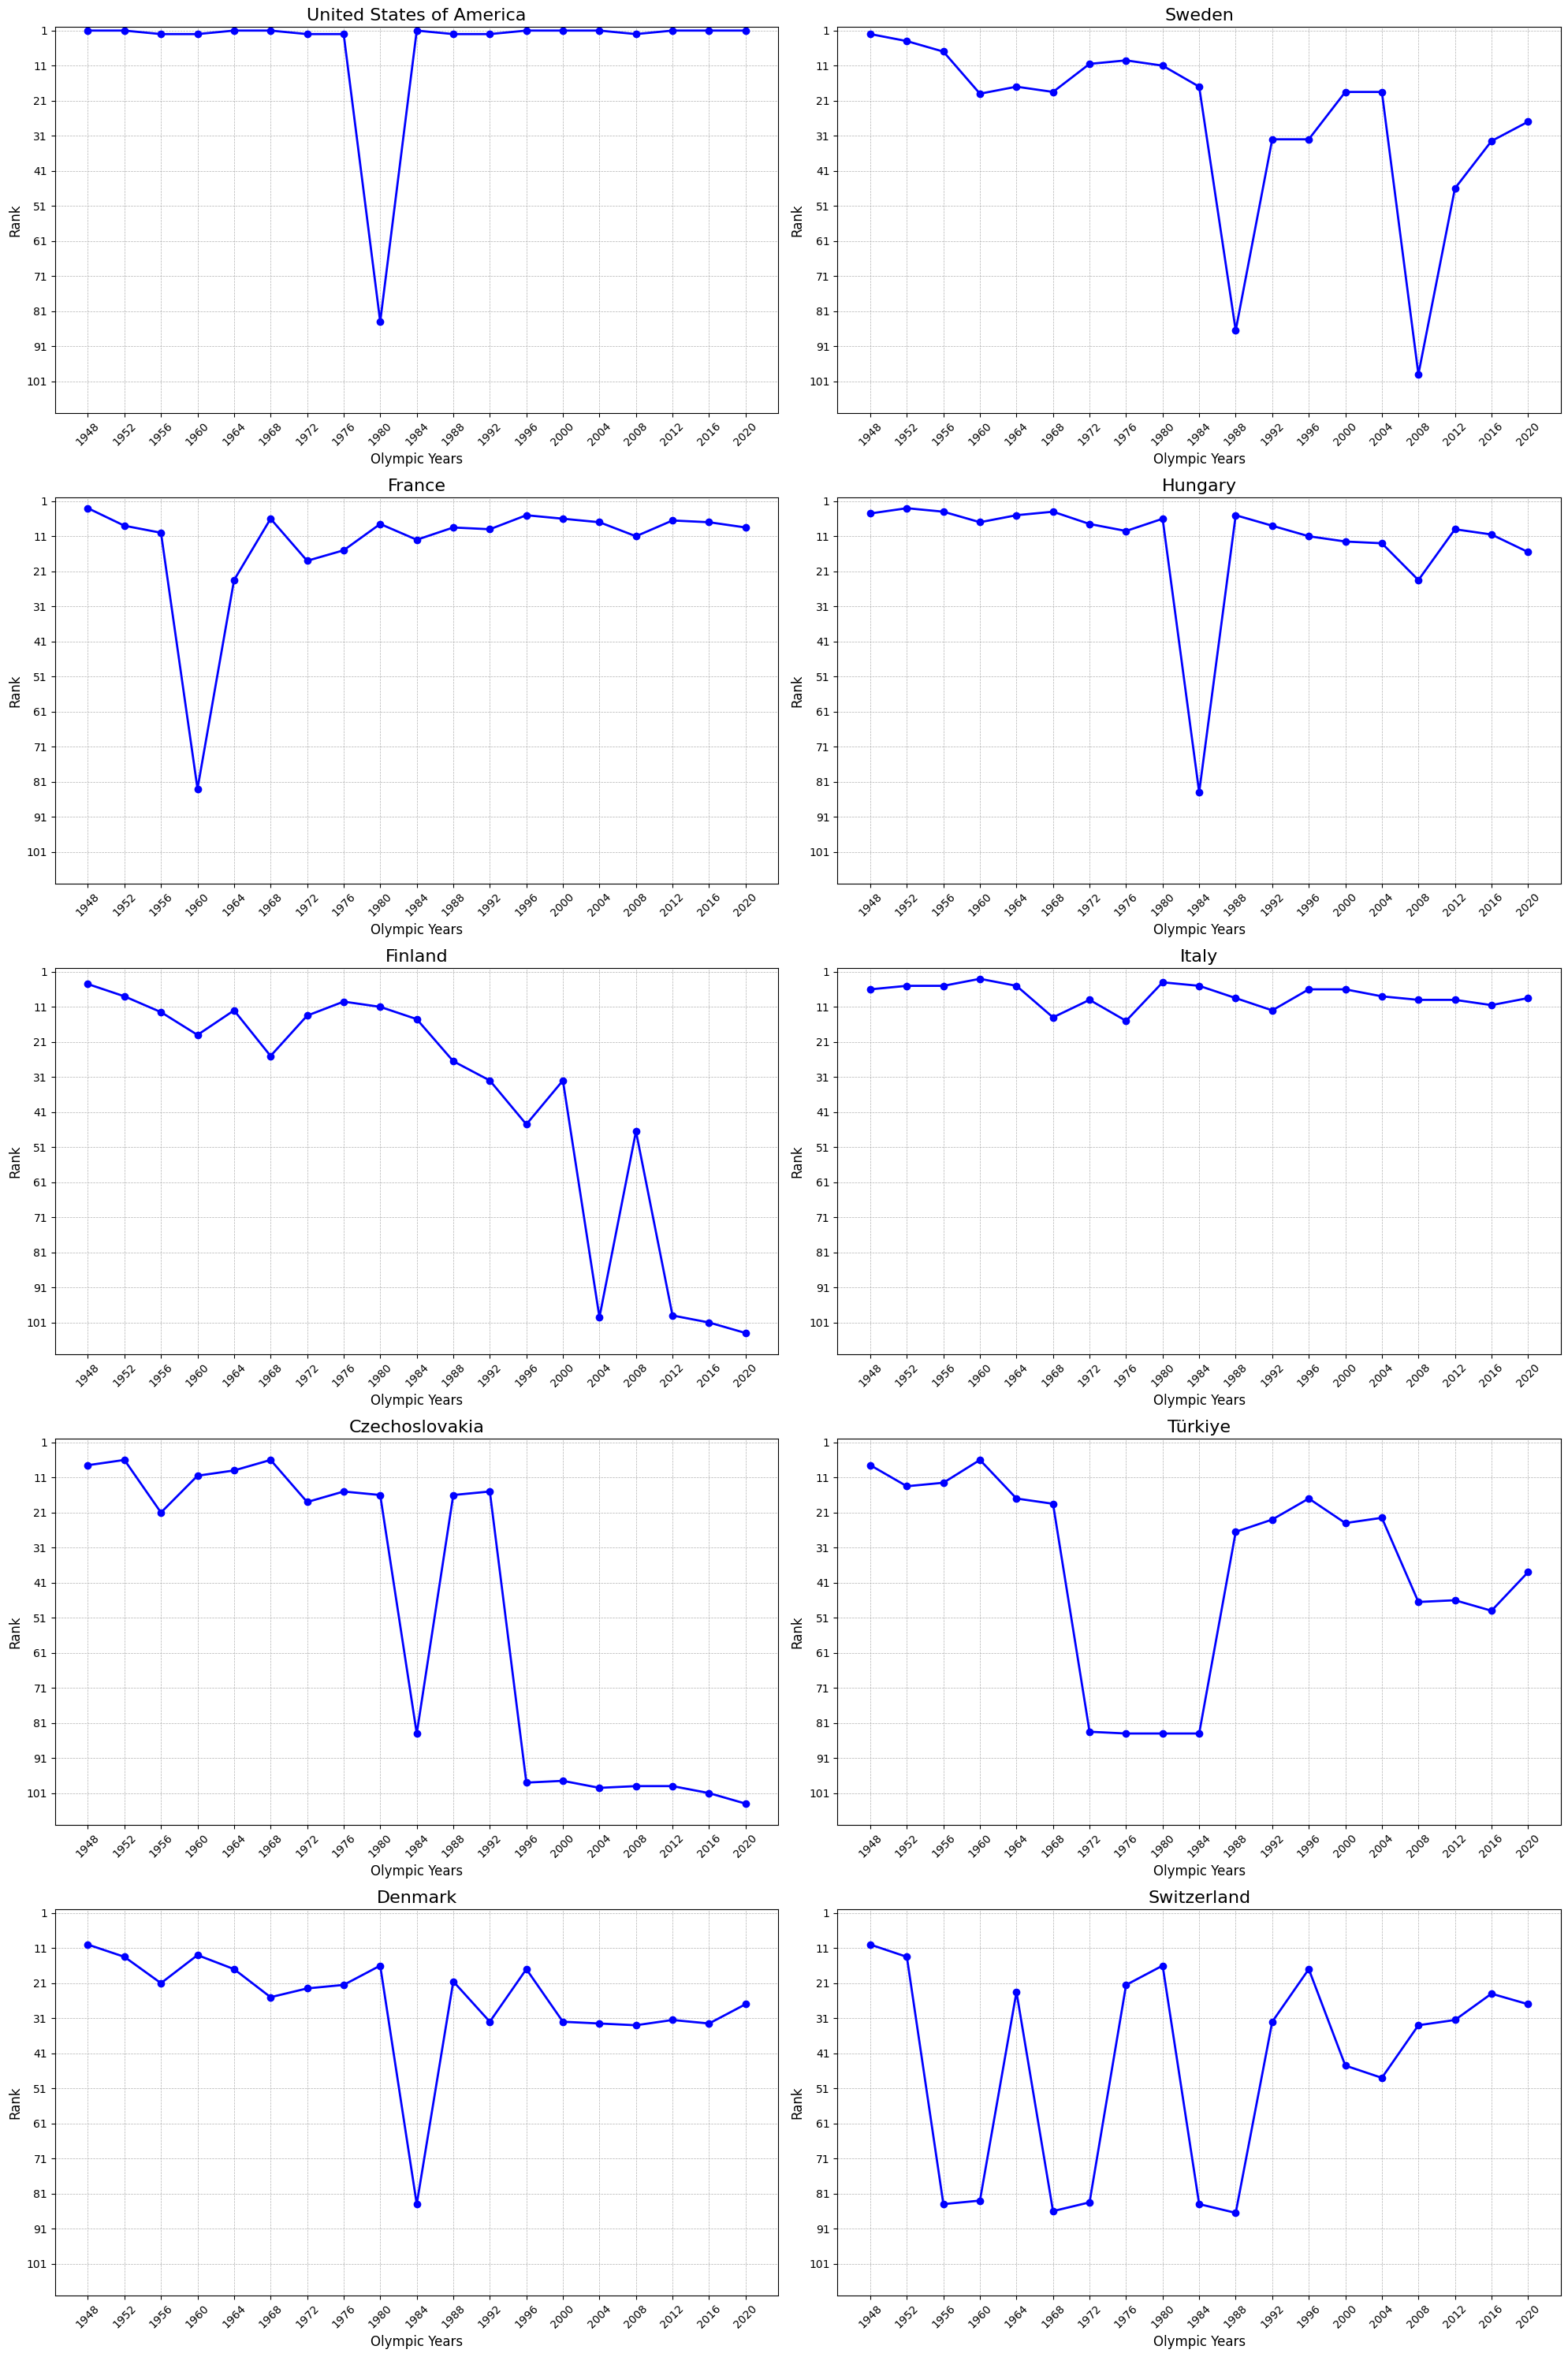

In [ ]:
plt.figure(figsize=(20, 30))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.plot(
        top_ten_sorted.columns[1:],
        top_ten_sorted.iloc[i, 1:],
        marker="o",
        linestyle='-',
        linewidth=2,
        color='blue'
    )
    plt.title(top_ten_sorted.iloc[i, 0], fontsize=16)
    plt.ylabel("Rank", fontsize=12)
    plt.xlabel("Olympic Years", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(range(1, 111, 10), fontsize=10)
    plt.ylim(110, 0)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()





*   This set of individual line plots shows the rank changes for each of the top 10 countries across different Olympic years. Each subplot focuses on a single country, making it easier to analyze specific trends.




 Plotting a heatmap to show the rank changes of the top 10 countries over time.

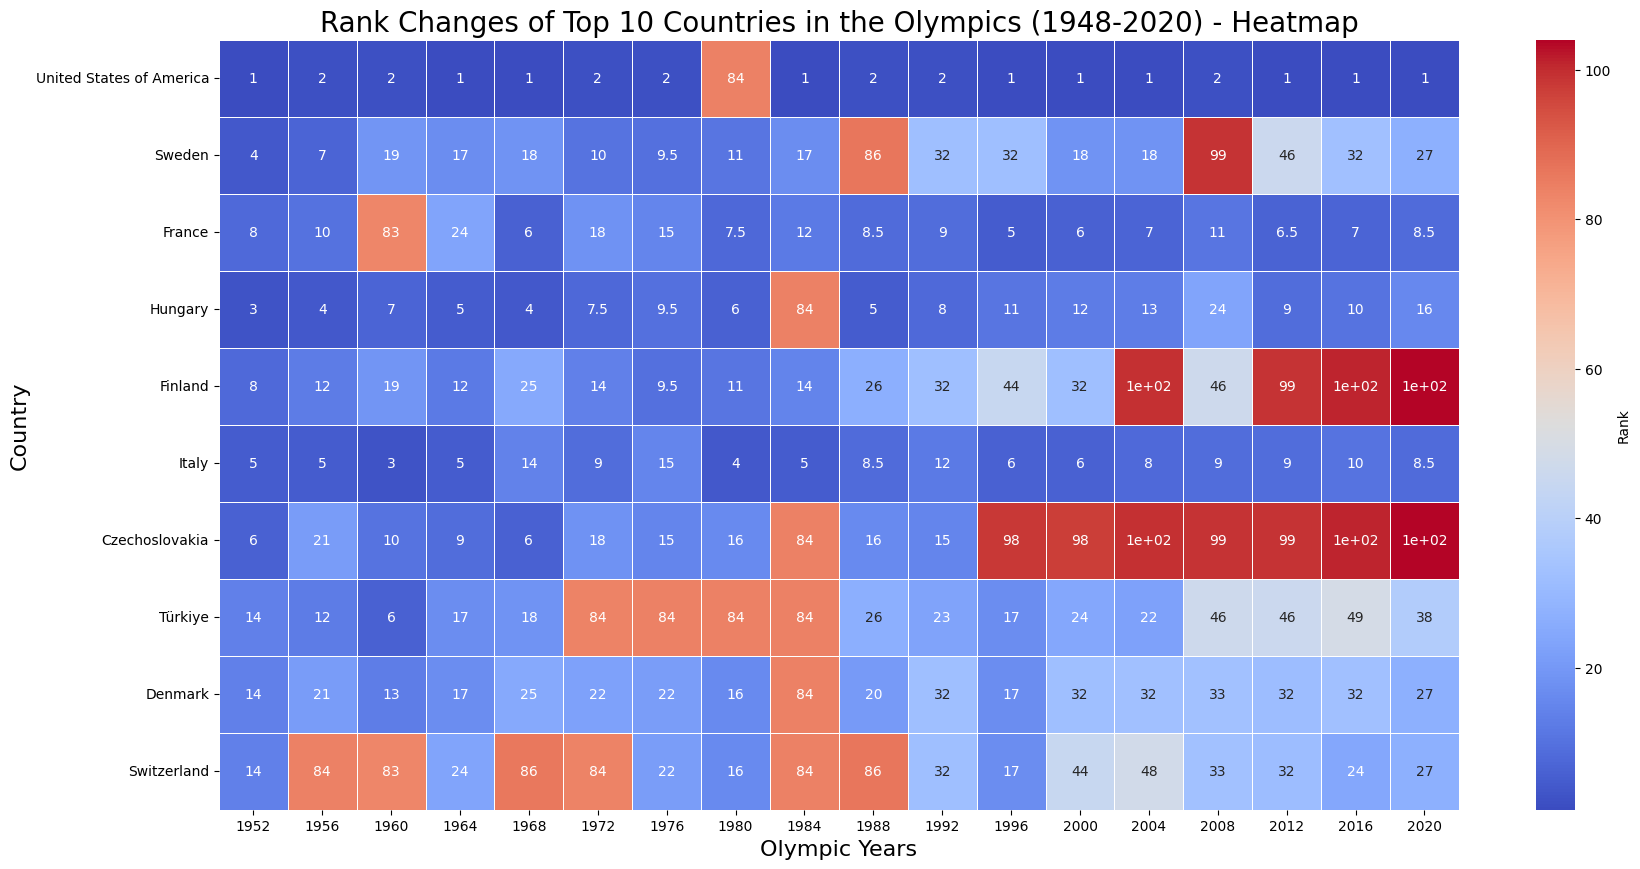

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(top_ten_sorted.set_index('country').iloc[:, 1:], annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Rank'})
plt.ylabel("Country", fontsize=16)
plt.xlabel("Olympic Years", fontsize=16)
plt.title("Rank Changes of Top 10 Countries in the Olympics (1948-2020) - Heatmap", fontsize=20)
plt.show()



*   This heatmap visualizes the rank changes of the top 10 countries over time, with color intensity representing the ranking. Darker colors indicate higher ranks, and it provides an at-a-glance overview of which countries have been most successful over the years.


